Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



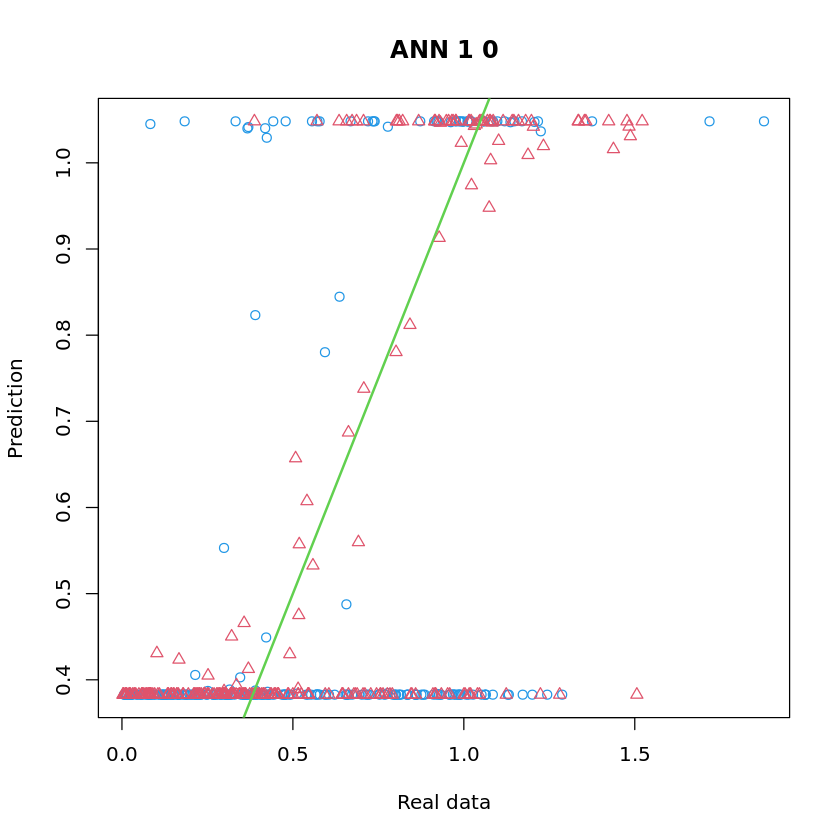

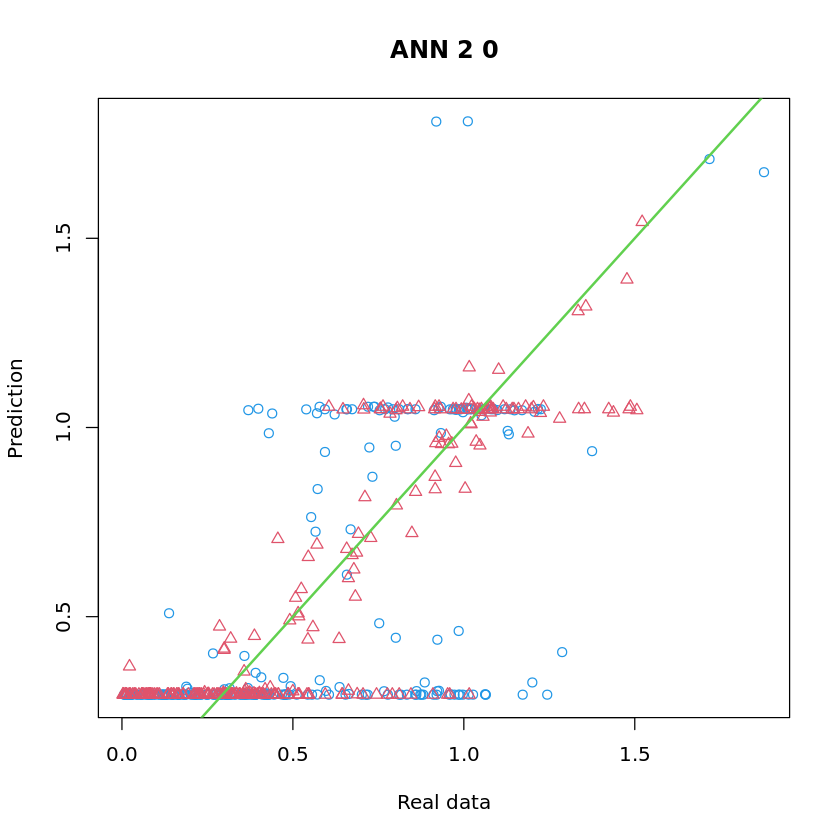

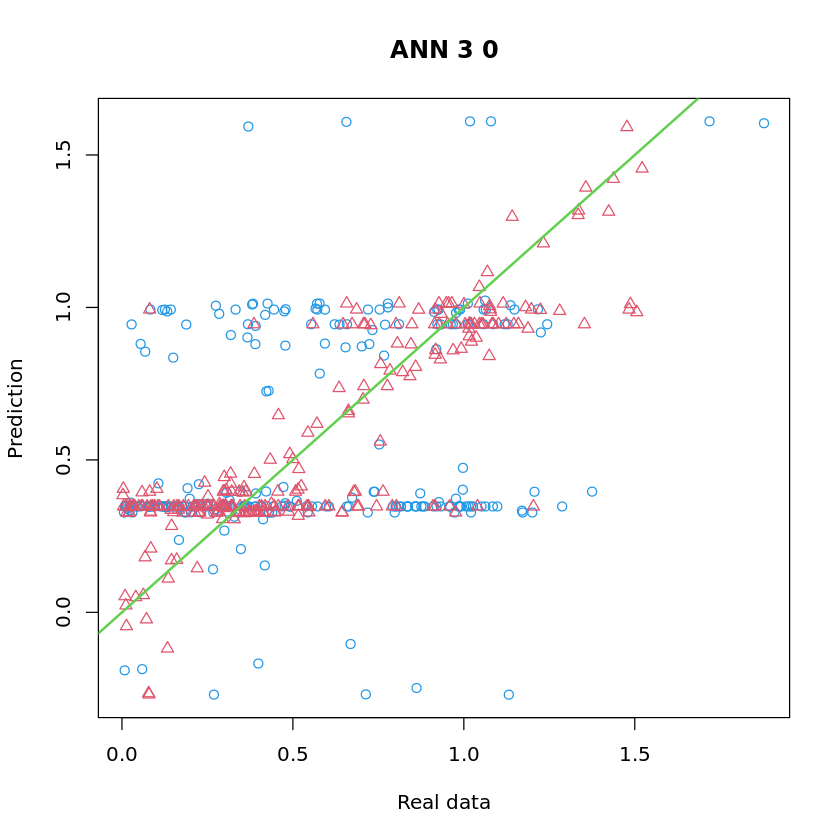

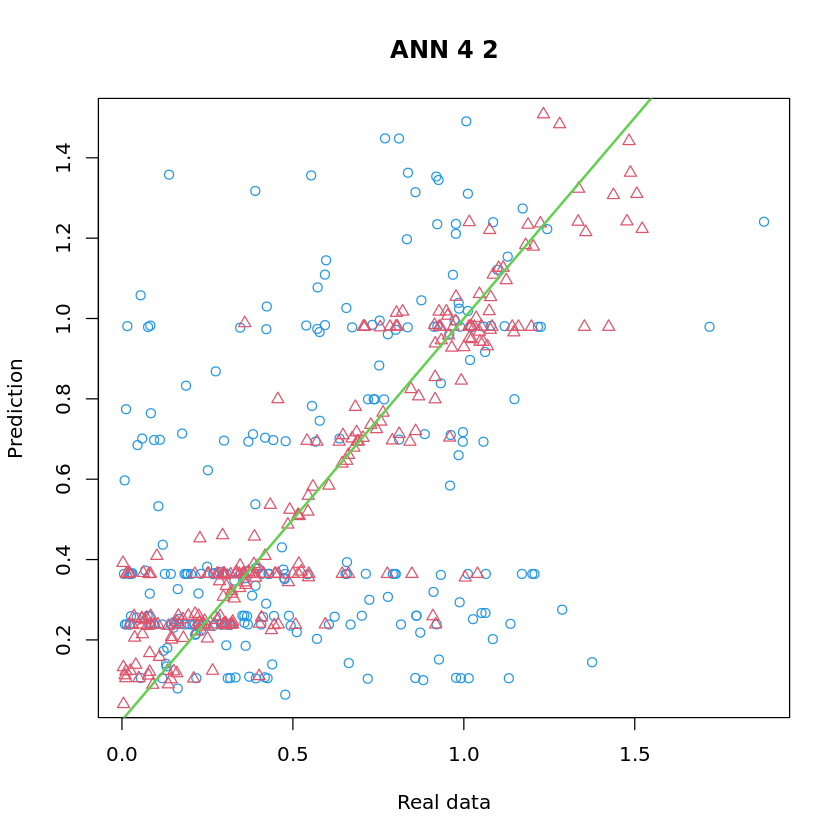

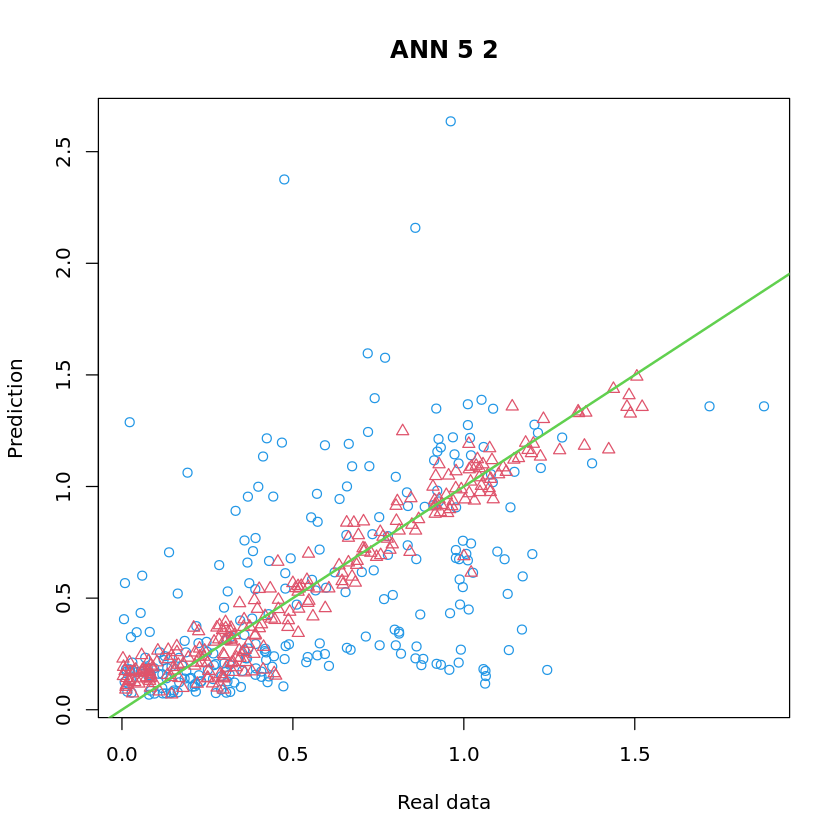

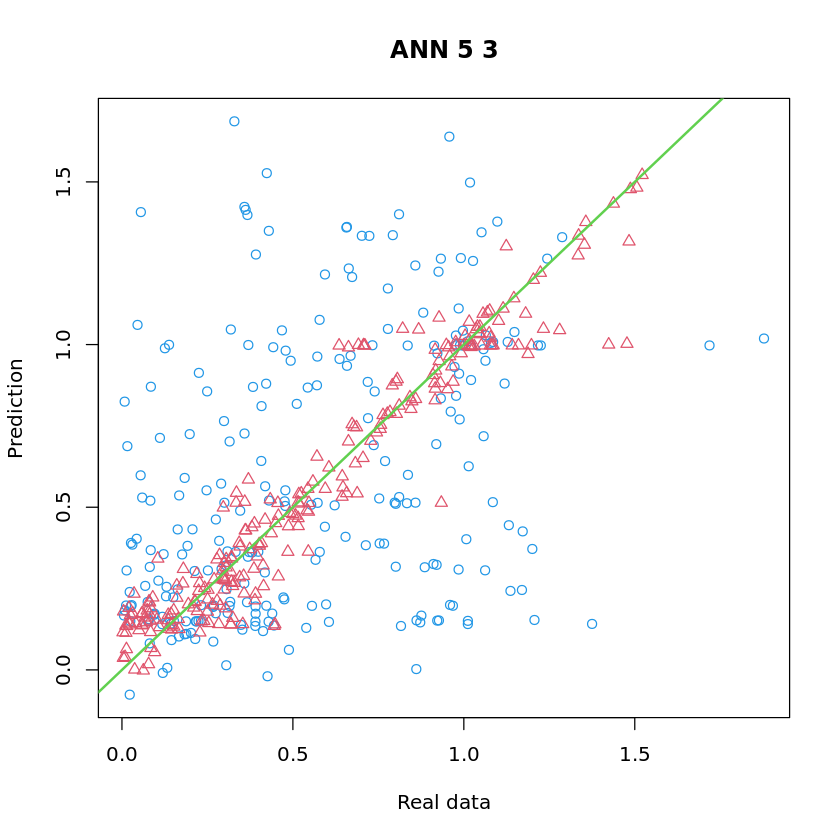

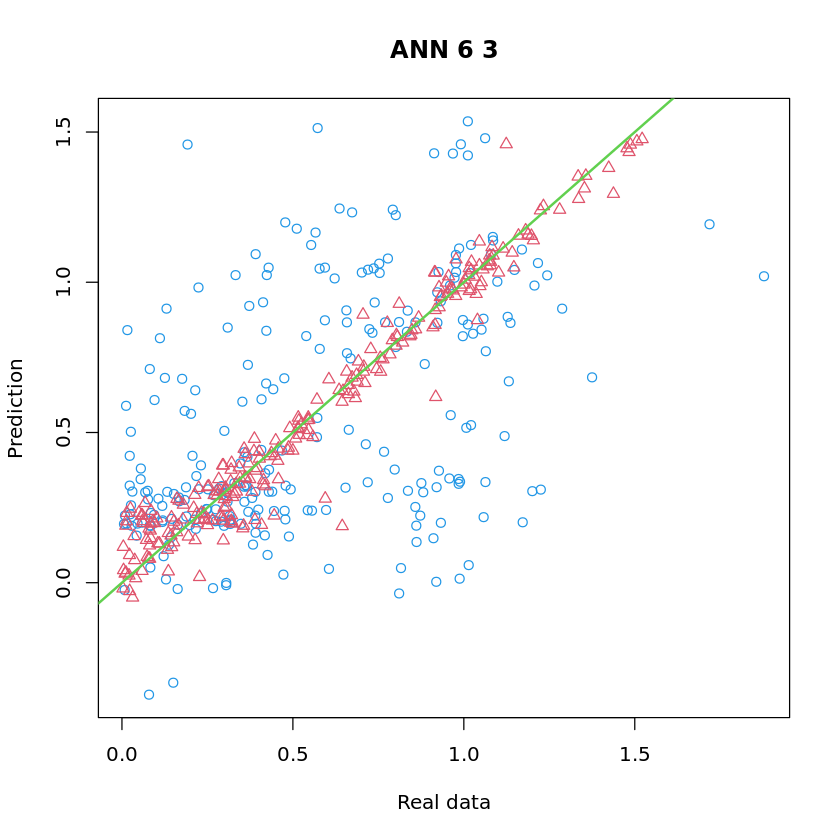

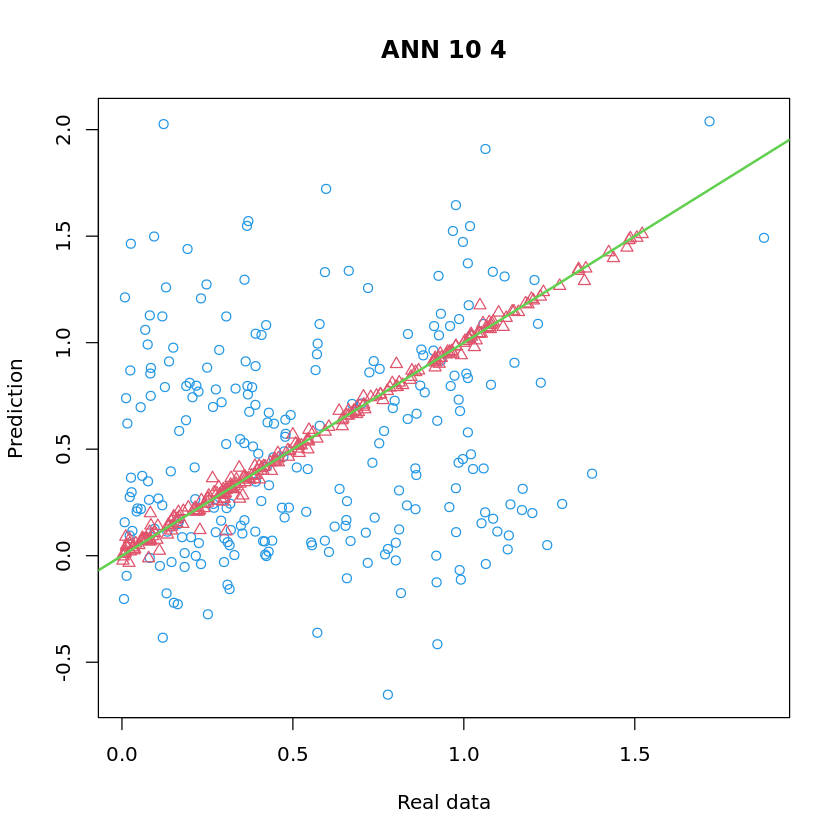

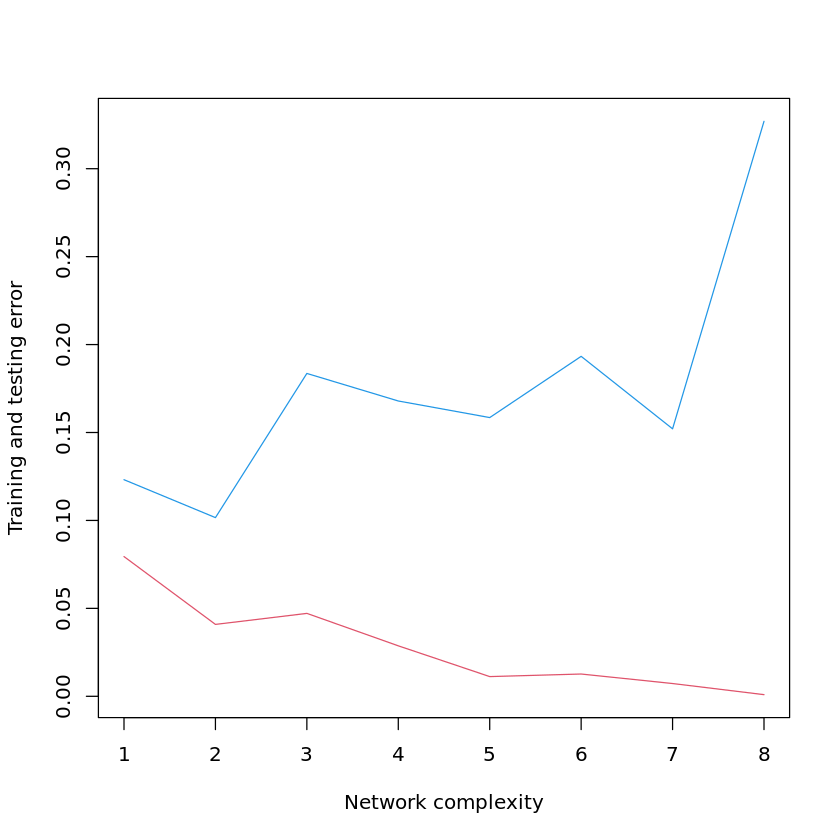

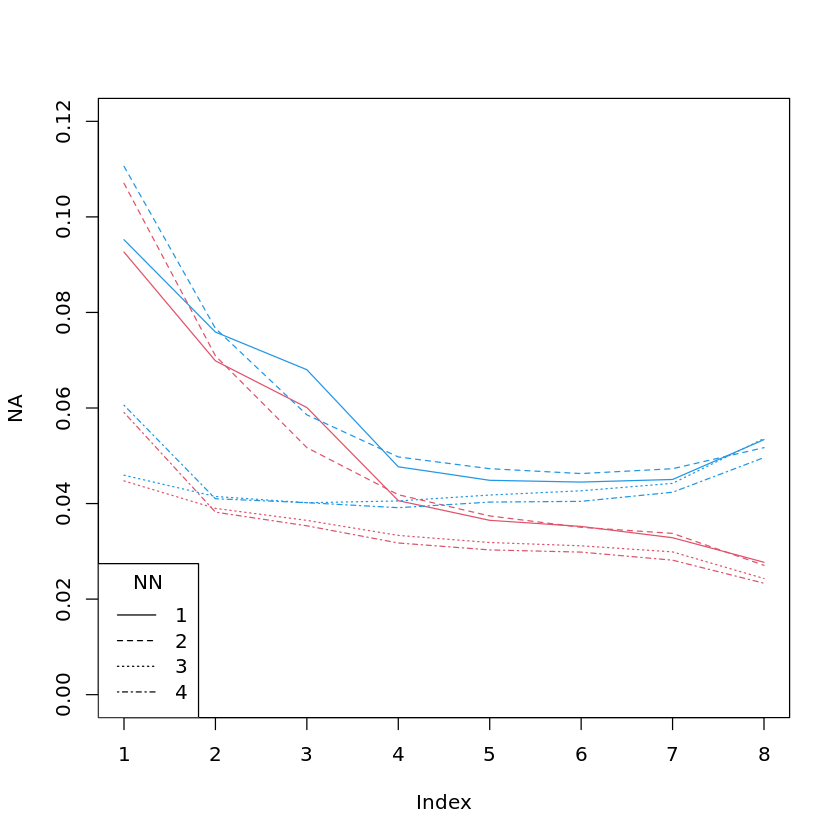

In [2]:
######################################################################################################
## R-script for the plot of the figure 6 of the paper https://doi.org/10.1080/15472450.2019.1621756 ##
######################################################################################################


rm(list = ls())
#setwd('C:/Users/antoi/Desktop/data_analysis_JITS_NN/')
install.packages('neuralnet')
require(neuralnet)


######################################################################################################
## Functions for training and testing of the neuronal nets
## a is the number of the neurone(s) on the first layer and b the number on the second.
## r=1,2,3,4 is the code for the inputs (NN1, NN2, NN3, NN4 in the paper)

sig_ann=function(data,a,b,r){
	data[,6]=sqrt(data[,3]^2+data[,4]^2)
	if(r==1) data=data[,6:26]
	if(r==2) data=data[,6:46]
	if(r>2){ 
	d=matrix(-1,nrow(data),K);pp=NULL
	for(k in 1:K) 
		d[,k]=sqrt(data[,6+2*k-1]^2+data[,6+2*k]^2)
	for(i in 1:nrow(data))
		pp=c(pp,mean(d[i,]));
	if(r==3){
		data=cbind(data[,6:26],pp)
		data=as.data.frame(data);colnames(data)=paste('V',6:27,sep='')}	
	if(r==4){
		data=cbind(data[,6:46],pp)
		data=as.data.frame(data);colnames(data)=paste('V',6:47,sep='')}}
	tr=as.data.frame(data[cc,])
	te=as.data.frame(data[!cc,])
	f=as.formula(paste("V6 ~", paste(names(tr)[!names(tr) %in% "V6"], collapse = " + ")))
	h=a;if(b>0)h=c(h,b)
	nn=neuralnet(f,data=tr,hidden=h,lifesign="none",stepmax=1e7,linear.output=T)
	pr.nn1=as.vector(compute(nn,tr[,2:ncol(tr)])$net.result)
	pr.nn2=as.vector(compute(nn,te[,2:ncol(te)])$net.result)
	plot(te$V6,pr.nn2,xlab='Real data',ylab='Prediction',main=paste('ANN',a,b),col=4)
	lines(tr$V6,pr.nn1,type='p',pch=2,col=2)
	abline(a=0,b=1,col=3,lwd=2)
	return=c(mean((tr$V6-pr.nn1)^2),mean((te$V6-pr.nn2)^2))}




######################################################################################################
## Computation of the results
## B is the number of bootstrap subsampling

B=1
aa=c(1,2,3,4,5,5,6,10) ## tested number of neurone(s) in the first layer
bb=c(0,0,0,2,2,3,3,4)  ## tested number of neurone(s) in the second layer

for(r in c(1)){
	data=rbind(as.matrix(read.table("close10-16speed",header=F)),as.matrix(read.table("bott10-16speed",header=F)))
	data=data[sample(1:nrow(data),500,replace=F),] ## Remove to use the full dataset!
	cc=((1:length(data[,1]))%%2==0)

	str=matrix(-1,B,length(aa))
	ste=matrix(-1,B,length(aa))
	for(b in 1:B){
		ccc=sample(1:nrow(data),nrow(data),replace=F)
		for(i in 1:length(aa)){
			res_ann=sig_ann(data[ccc,],aa[i],bb[i],r)
			str[b,i]=res_ann[1]
			ste[b,i]=res_ann[2]}}
	sdtr=apply(str,2,sd);sdte=apply(ste,2,sd)
	plot(NA,ylim=range(c(apply(ste,2,mean),apply(str,2,mean))),xlim=c(1,8),ylab="Training and testing error",xlab="Network complexity")
	lines(apply(ste,2,mean),col=4,lty=r);lines(apply(str,2,mean),col=2,lty=r)
	#write.table(cbind(str,ste),paste("trainRB",r,sep=""),col.names=F,row.names=F,quote=F,sep=" ")
}


######################################################################################################
## Plotting of results preliminary computed for the full dataset with B=50 and r=1,2,3,4 (cf. paper)

plot(NA,ylim=c(0,.12),xlim=c(1,8))
legend("bottomleft",title="NN",legend=1:4,lty=1:4,col=1)
for(r in 1:4){
	res=as.matrix(read.table(paste("trainRB",r,sep="")))
	str=res[,1:8];ste=res[,9:16]
	lines(apply(ste,2,mean),col=4,lty=r);lines(apply(str,2,mean),col=2,lty=r)}






